In [7]:
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [8]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# main
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

# misc
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

In [9]:
# reading data
data = pd.read_csv('/content/data.csv')
data

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,PITCHER_KEY,THROW_SIDE_KEY,PITCH_TYPE_TRACKED_KEY,EVENT_RESULT_KEY,PITCH_RESULT_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,668881,R,FB,field_out,InPlay,14.54220,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,668881,R,FB,NaN,BallCalled,14.25380,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,668881,R,SL,single,InPlay,5.56877,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,668881,R,SL,NaN,FoulBall,4.80541,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,668881,R,SL,NaN,BallCalled,4.13239,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,2,1,0,1,0,0,643361,R,FB,NaN,StrikeCalled,15.72580,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,2,1,1,1,0,0,643361,R,CF,NaN,BallCalled,10.86980,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,2,2,1,1,0,0,643361,R,FB,NaN,FoulBall,14.10840,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,2,2,2,1,0,0,643361,R,CH,double,InPlay,10.49140,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


In [10]:
data['THROW_SIDE_KEY'].value_counts()

,count
THROW_SIDE_KEY,
R,7268
L,2621


In [11]:
data['HORIZONTAL_BREAK'] = data.apply(lambda x: -x['HORIZONTAL_BREAK'] if x['THROW_SIDE_KEY'] == 'L' else x['HORIZONTAL_BREAK'], axis=1)
data['RELEASE_SIDE'] = data.apply(lambda x: -x['RELEASE_SIDE'] if x['THROW_SIDE_KEY'] == 'L' else x['RELEASE_SIDE'], axis=1)
data['HORIZONTAL_APPROACH_ANGLE'] = data.apply(lambda x: -x['HORIZONTAL_APPROACH_ANGLE'] if x['THROW_SIDE_KEY'] == 'L' else x['HORIZONTAL_APPROACH_ANGLE'], axis=1)
data = data.drop(columns="THROW_SIDE_KEY")

In [12]:
data.isna().sum()

,0
PID,0
INNING_KEY,0
BATTER_IN_INNING_KEY,0
PITCH_NUMBER,0
OUT_KEY,0
BALLS,0
STRIKES,0
IS_RUNNER_ON_1B,0
IS_RUNNER_ON_2B,0
IS_RUNNER_ON_3B,0


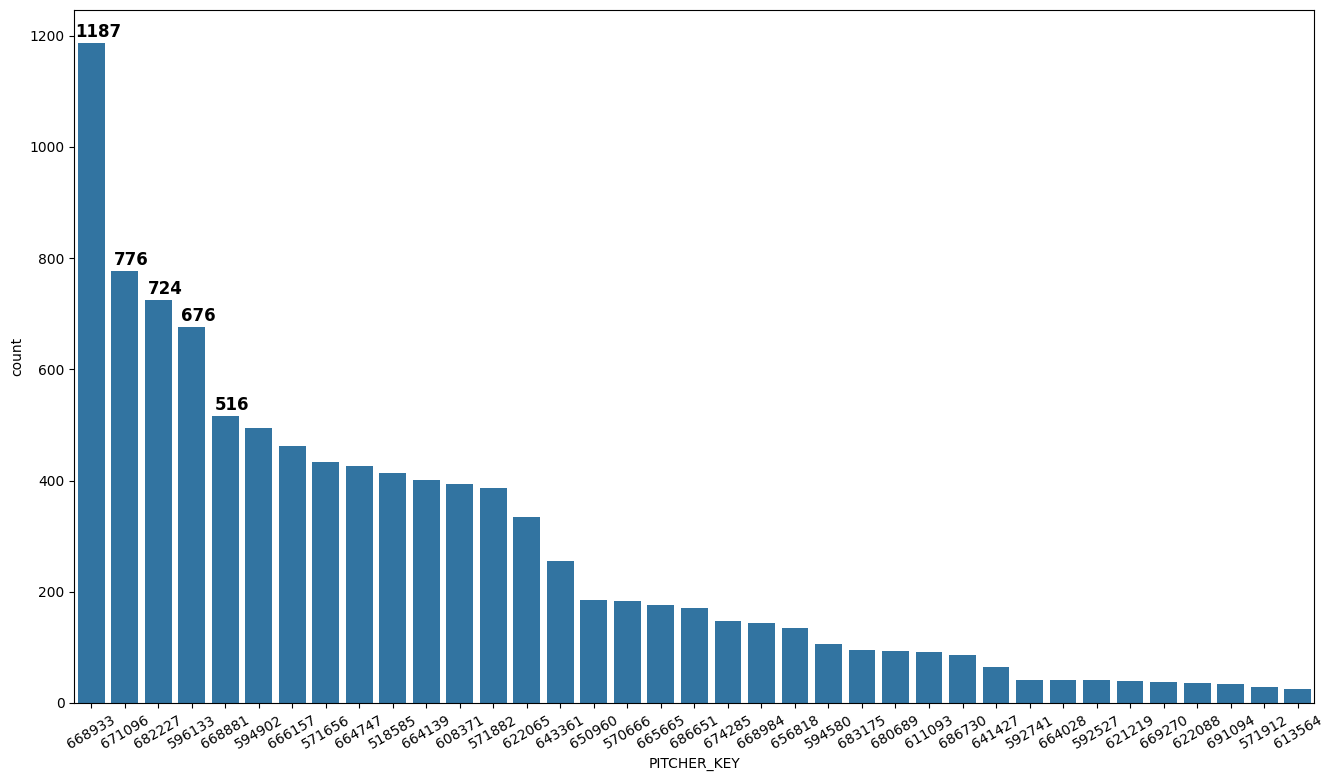

In [13]:
# plot to show different number of pitchers
fig_pitcher, ax_pitcher = plt.subplots(figsize=(16,9))
sns.countplot(data, x="PITCHER_KEY", ax=ax_pitcher, order=data['PITCHER_KEY'].value_counts().index)
plt.xticks(rotation=30)
for index, value in enumerate(data['PITCHER_KEY'].value_counts()[0:5]):
    label = '{}'.format(value)
    ax_pitcher.annotate(label,
                xy=(index+0.2, value+20),
                ha='center',
                va='center',
                fontweight='bold',
                size=12)
plt.show()

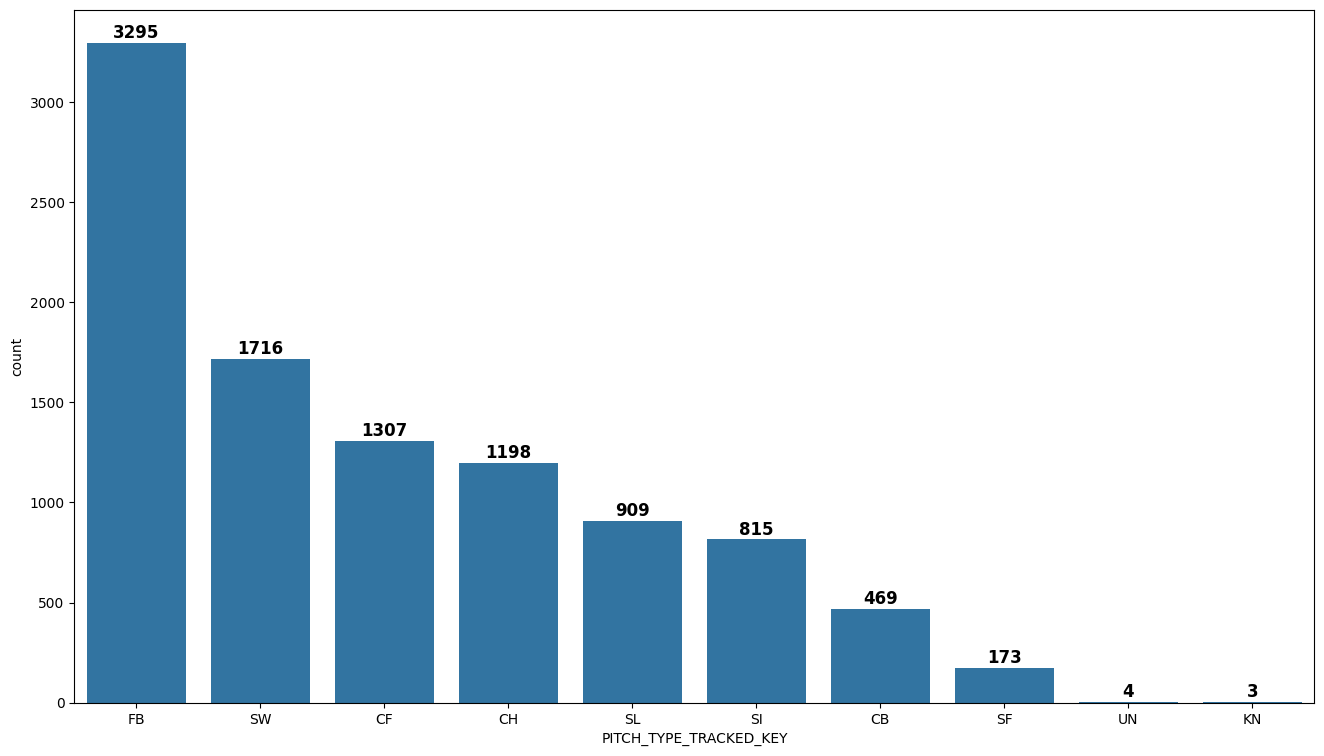

In [14]:
# plot to show different types of pitches and quantity
fig_pitches, ax_pitches = plt.subplots(figsize=(16,9))
sns.countplot(data, x="PITCH_TYPE_TRACKED_KEY", ax=ax_pitches, order=data['PITCH_TYPE_TRACKED_KEY'].value_counts().index)
for index, value in enumerate(data['PITCH_TYPE_TRACKED_KEY'].value_counts()):
    label = '{}'.format(value)
    ax_pitches.annotate(label,
                xy=(index, value+50),
                ha='center',
                va='center',
                fontweight='bold',
                size=12)
plt.show()

In [15]:
# since there are 7 pitches that are tagged Unknown and Knuckleball, I have decided to remove them.
data = data[~((data['PITCH_TYPE_TRACKED_KEY']=='UN') | (data['PITCH_TYPE_TRACKED_KEY']=='KN'))]
data

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,EVENT_RESULT_KEY,PITCH_RESULT_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,668881,FB,field_out,InPlay,14.54220,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,668881,FB,NaN,BallCalled,14.25380,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,668881,SL,single,InPlay,5.56877,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,668881,SL,NaN,FoulBall,4.80541,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,668881,SL,NaN,BallCalled,4.13239,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,2,1,0,1,0,0,643361,FB,NaN,StrikeCalled,15.72580,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,2,1,1,1,0,0,643361,CF,NaN,BallCalled,10.86980,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,2,2,1,1,0,0,643361,FB,NaN,FoulBall,14.10840,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,2,2,2,1,0,0,643361,CH,double,InPlay,10.49140,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


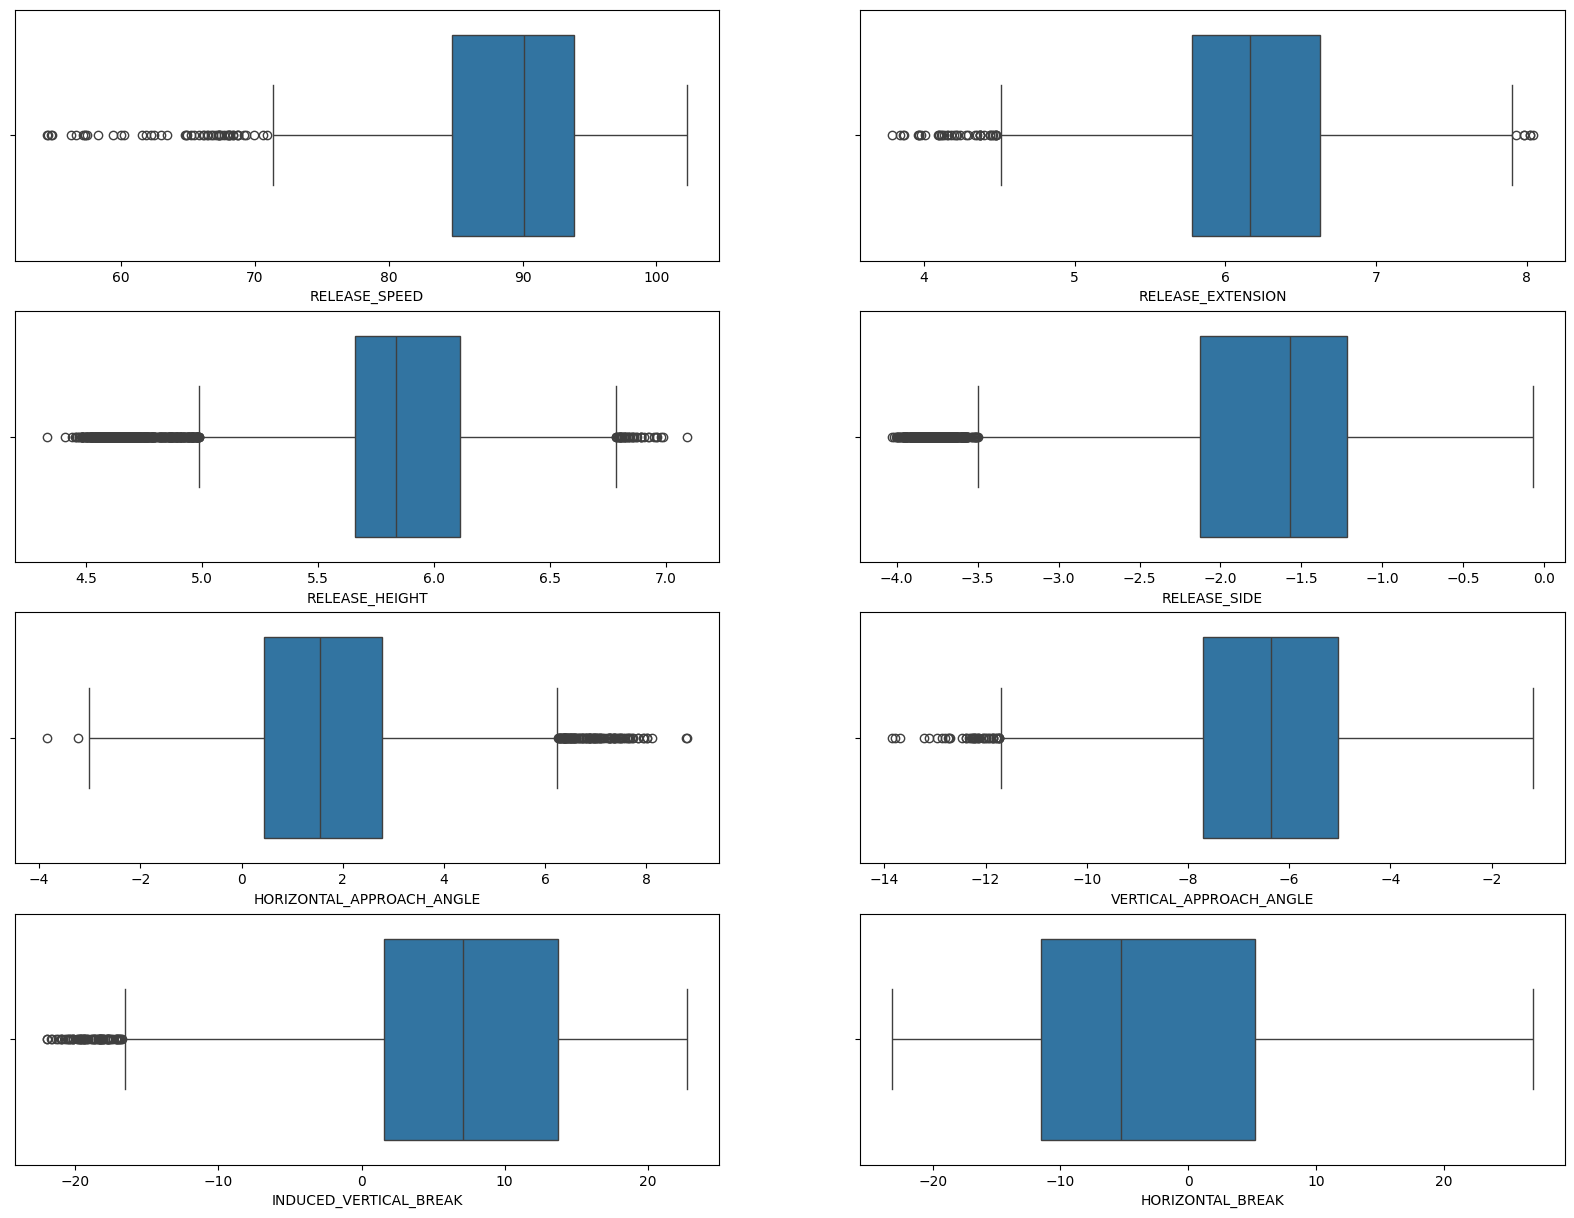

In [16]:
# box plot to look for outliers, followed by describe method
fig_pchar, ax_pchar = plt.subplots(4,2,figsize=(20,15))
sns.boxplot(data, x="RELEASE_SPEED", ax=ax_pchar[0][0])
sns.boxplot(data, x="RELEASE_EXTENSION", ax=ax_pchar[0][1])
sns.boxplot(data, x="RELEASE_HEIGHT", ax=ax_pchar[1][0])
sns.boxplot(data, x="RELEASE_SIDE", ax=ax_pchar[1][1])
sns.boxplot(data, x="HORIZONTAL_APPROACH_ANGLE", ax=ax_pchar[2][0])
sns.boxplot(data, x="VERTICAL_APPROACH_ANGLE", ax=ax_pchar[2][1])
sns.boxplot(data, x="INDUCED_VERTICAL_BREAK", ax=ax_pchar[3][0])
sns.boxplot(data, x="HORIZONTAL_BREAK", ax=ax_pchar[3][1])
plt.show()

In [17]:
data[data['RELEASE_SPEED']<70].groupby('PITCHER_KEY')['PITCH_TYPE_TRACKED_KEY'].value_counts()

,,count
PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,
571912,FB,23
613564,FB,25
621219,CB,3
682227,CB,1


In [18]:
data[data['RELEASE_SPEED']<75].groupby('PITCHER_KEY')['RELEASE_SPEED'].mean()

,RELEASE_SPEED
PITCHER_KEY,
571882,74.915348
571912,67.870132
592527,74.433899
594902,74.475957
613564,60.212256
621219,67.533033
643361,74.701599
682227,72.762039


In [19]:
data = data[~((data['PITCHER_KEY']==571912)|(data['PITCHER_KEY']==613564))]
data

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,EVENT_RESULT_KEY,PITCH_RESULT_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,668881,FB,field_out,InPlay,14.54220,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,668881,FB,NaN,BallCalled,14.25380,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,668881,SL,single,InPlay,5.56877,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,668881,SL,NaN,FoulBall,4.80541,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,668881,SL,NaN,BallCalled,4.13239,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,2,1,0,1,0,0,643361,FB,NaN,StrikeCalled,15.72580,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,2,1,1,1,0,0,643361,CF,NaN,BallCalled,10.86980,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,2,2,1,1,0,0,643361,FB,NaN,FoulBall,14.10840,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,2,2,2,1,0,0,643361,CH,double,InPlay,10.49140,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


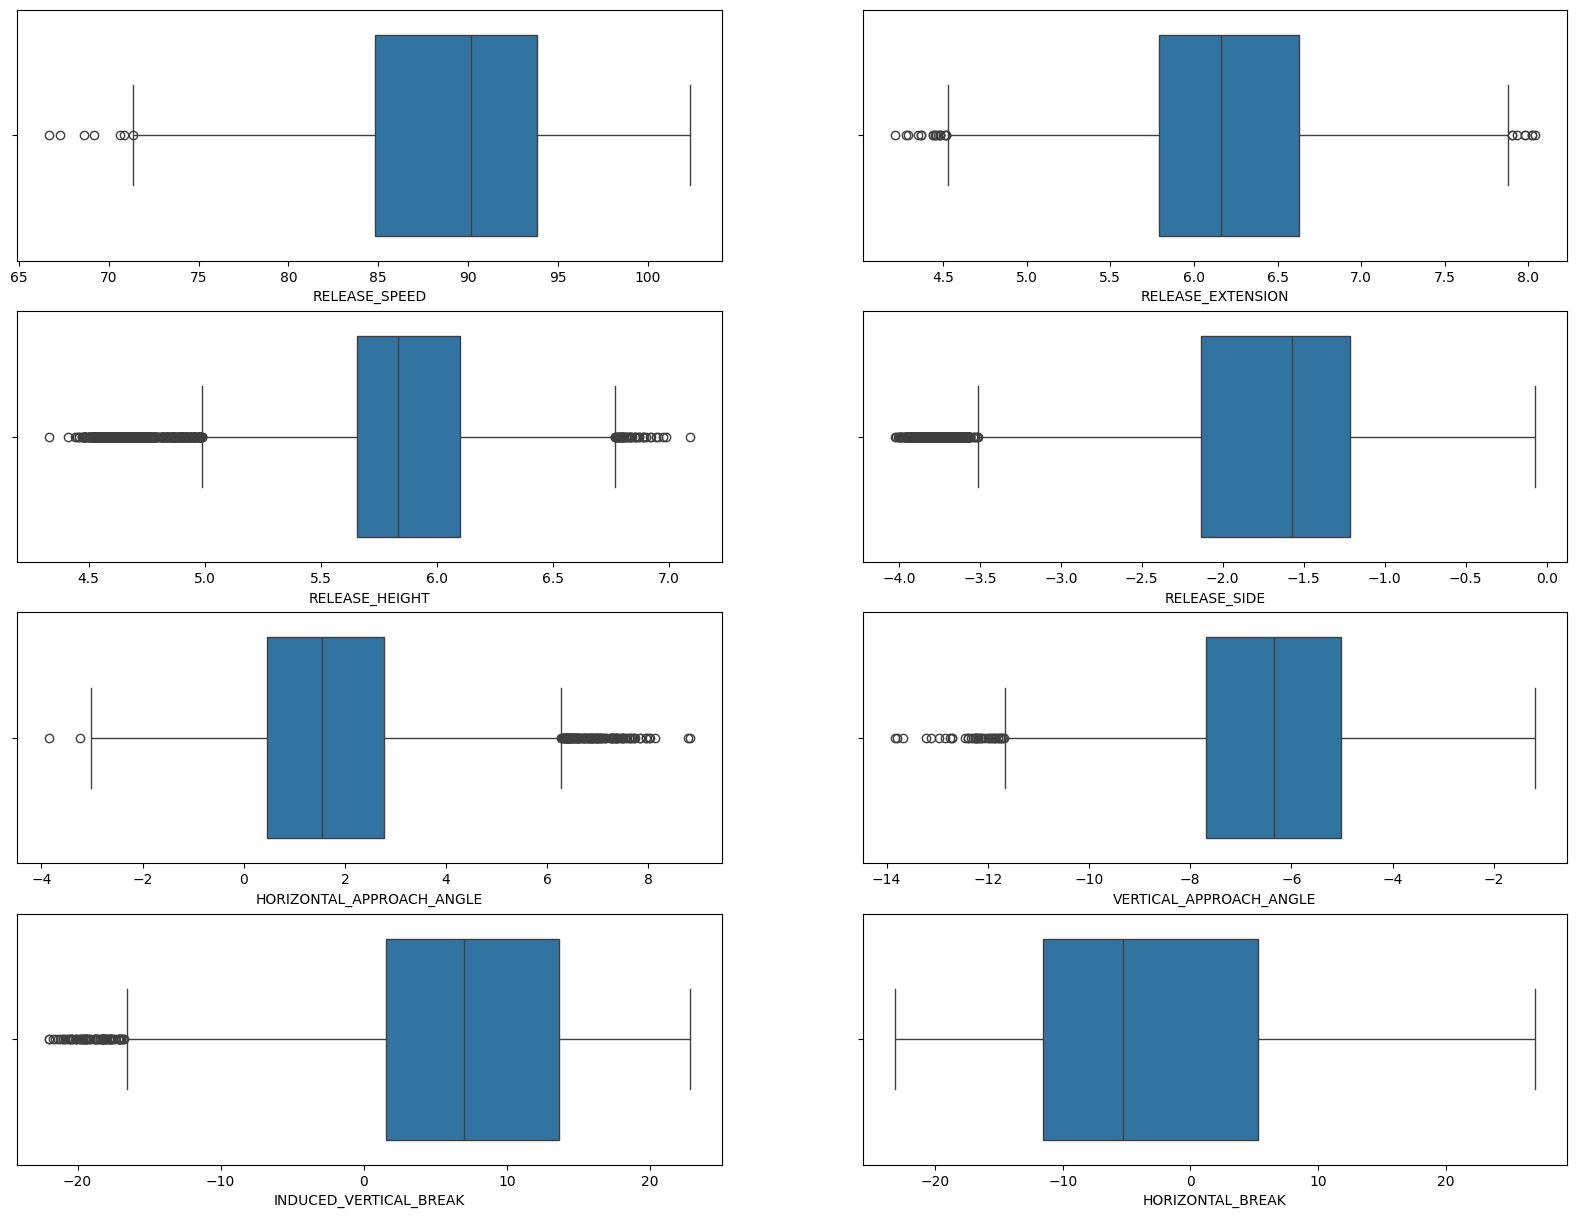

In [20]:
# box plot to look for outliers, followed by describe method
fig_pchar, ax_pchar = plt.subplots(4,2,figsize=(20,15))
sns.boxplot(data, x="RELEASE_SPEED", ax=ax_pchar[0][0])
sns.boxplot(data, x="RELEASE_EXTENSION", ax=ax_pchar[0][1])
sns.boxplot(data, x="RELEASE_HEIGHT", ax=ax_pchar[1][0])
sns.boxplot(data, x="RELEASE_SIDE", ax=ax_pchar[1][1])
sns.boxplot(data, x="HORIZONTAL_APPROACH_ANGLE", ax=ax_pchar[2][0])
sns.boxplot(data, x="VERTICAL_APPROACH_ANGLE", ax=ax_pchar[2][1])
sns.boxplot(data, x="INDUCED_VERTICAL_BREAK", ax=ax_pchar[3][0])
sns.boxplot(data, x="HORIZONTAL_BREAK", ax=ax_pchar[3][1])
plt.show()

In [21]:
data.describe()

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,PITCHER_KEY,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
count,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000,9831.000000
mean,12645.862069,4.985454,2.935815,2.881904,0.998881,0.884142,0.875598,0.309124,0.173838,0.101821,637699.332825,6.877742,-2.740236,2297.552968,89.282883,-1.724109,5.822326,6.233342,1.700410,-6.401532,0.073171,2.336383
std,7799.810427,2.651799,1.742197,1.715405,0.822186,0.965479,0.822673,0.462156,0.378989,0.302428,44884.398632,7.729233,10.840579,375.214272,5.627576,0.755182,0.458726,0.551836,1.694808,1.822700,0.822985,0.975562
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,518585.000000,-21.982201,-23.168800,524.210999,66.687302,-4.026390,4.330060,4.210000,-3.847480,-13.842500,-3.588650,-1.892670
25%,6024.500000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,596133.000000,1.545145,-11.543300,2136.484985,84.840599,-2.134035,5.656995,5.790000,0.452239,-7.681820,-0.479814,1.686955
50%,12633.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,664747.000000,7.007230,-5.254030,2324.469971,90.149200,-1.571090,5.833540,6.160000,1.548290,-6.354580,0.073673,2.337760
75%,19554.000000,7.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,668933.000000,13.636100,5.257600,2505.484985,93.845848,-1.215795,6.102255,6.630000,2.779205,-5.021065,0.622613,2.999535
max,28755.000000,11.000000,14.000000,14.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,691094.000000,22.767300,26.991199,3314.679932,102.327003,-0.071233,7.090960,8.040000,8.813830,-1.185400,3.983160,6.079330


In [22]:
data = data.loc[:,['PID', 'PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY', 'SPIN_RATE_ABSOLUTE',
       'RELEASE_SPEED', 'RELEASE_SIDE', 'RELEASE_HEIGHT', 'RELEASE_EXTENSION',
       'HORIZONTAL_APPROACH_ANGLE', 'VERTICAL_APPROACH_ANGLE','INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK']]
data

,PID,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK
0,197,668881,FB,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,14.54220,-12.36030
1,348,668881,FB,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,14.25380,-10.95030
2,1072,668881,SL,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,5.56877,4.35335
3,420,668881,SL,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,4.80541,4.27254
4,198,668881,SL,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,4.13239,1.62418
...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,643361,FB,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,15.72580,-8.54239
9885,28642,643361,CF,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,10.86980,0.60670
9886,22664,643361,FB,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,14.10840,-10.84110
9887,22665,643361,CH,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,10.49140,-13.44000


In [25]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame

# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=np.number).columns
numerical_data = data[numerical_features]

# Calculate and display the correlation matrix
display(numerical_data.corr())

def high_corr_pairs(df, threshold=0.8):
    """
    Identify pairs of variables in a DataFrame that have a correlation coefficient above a specified threshold.

    Parameters:
    - df (DataFrame): The input data.
    - threshold (float, optional): The correlation coefficient threshold. Defaults to 0.8.

    Returns:
    - list of tuples: Pairs of column names with high correlation.
    """
    # Select only numerical features for correlation analysis
    numerical_features = df.select_dtypes(include=np.number).columns
    df = df[numerical_features]

    corr_matrix = df.corr().abs()

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    pairs = []
    for column in to_drop:
        above_threshold_vars = upper.index[upper[column] > threshold].tolist()
        for atv in above_threshold_vars:
            pairs.append((column, atv))

    return pairs

high_corr_pairs(data, threshold=0.6)

,PID,PITCHER_KEY,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,INDUCED_VERTICAL_BREAK,HORIZONTAL_BREAK
PID,1.000000,0.108746,0.006415,0.008507,0.221509,0.003201,0.027265,-0.080007,0.043261,0.019736,0.065201
PITCHER_KEY,0.108746,1.000000,0.248474,0.148756,-0.237286,0.040599,0.027668,0.132120,0.043000,-0.003690,0.049950
SPIN_RATE_ABSOLUTE,0.006415,0.248474,1.000000,0.040228,-0.109316,-0.019736,-0.166269,0.523205,-0.046325,-0.145530,0.575978
RELEASE_SPEED,0.008507,0.148756,0.040228,1.000000,0.045998,0.098236,-0.020267,-0.380661,0.691127,0.719582,-0.486248
RELEASE_SIDE,0.221509,-0.237286,-0.109316,0.045998,1.000000,0.457217,-0.171425,-0.384783,-0.047240,0.083390,0.111178
RELEASE_HEIGHT,0.003201,0.040599,-0.019736,0.098236,0.457217,1.000000,-0.506256,-0.138715,-0.222843,-0.016746,0.106837
RELEASE_EXTENSION,0.027265,0.027668,-0.166269,-0.020267,-0.171425,-0.506256,1.000000,0.020898,0.177075,0.147325,-0.116992
HORIZONTAL_APPROACH_ANGLE,-0.080007,0.132120,0.523205,-0.380661,-0.384783,-0.138715,0.020898,1.000000,-0.397760,-0.418500,0.732511
VERTICAL_APPROACH_ANGLE,0.043261,0.043000,-0.046325,0.691127,-0.047240,-0.222843,0.177075,-0.397760,1.000000,0.801221,-0.435673
INDUCED_VERTICAL_BREAK,0.019736,-0.003690,-0.145530,0.719582,0.083390,-0.016746,0.147325,-0.418500,0.801221,1.000000,-0.518992


[('VERTICAL_APPROACH_ANGLE', 'RELEASE_SPEED'),
 ('INDUCED_VERTICAL_BREAK', 'RELEASE_SPEED'),
 ('INDUCED_VERTICAL_BREAK', 'VERTICAL_APPROACH_ANGLE'),
 ('HORIZONTAL_BREAK', 'HORIZONTAL_APPROACH_ANGLE')]

In [26]:
# class Model to implement the mixed effect modeling
class Model:
    def __init__(self, formula, data):
        """
        Initializes the Model class.

        Parameters:
        - formula (str): A Patsy-compatible formula representing the fixed-effects relationship.
        - data (DataFrame): The data to be used for model estimation.
        """
        self.data = data
        self.formula = formula

    def scale_data(self, dummy):
        """
        Scales the non-categorical columns in the dataset to have zero mean and unit variance.

        Parameters:
        - dummy (DataFrame): A dataframe containing only the columns to be scaled.
        """
        scaler = StandardScaler()
        scaled_data = pd.DataFrame(scaler.fit_transform(dummy), columns=self.data.iloc[:,3:].columns)
        self.data = pd.concat([self.data.iloc[:,:3],scaled_data], axis=1)

    def build_model(self, *group_col):
        """
        Builds the mixed linear model. Can handle either single or nested groupings.

        Parameters:
        - *group_col (str): Names of the grouping columns.
        """
        # For single grouping
        if len(group_col) == 1:
            self.model = smf.mixedlm(self.formula, self.data, groups=self.data[group_col[0]]).fit()
        # For nested grouping
        elif len(group_col) == 2:
            # Create combined grouping variable for nested grouping if either is a string column
            if self.data[group_col[0]].dtypes == object or self.data[group_col[1]].dtypes == object:
                self.data[group_col[0] + '_' + group_col[1]] = str(self.data[group_col[0]]) + '_' + str(self.data[group_col[1]])
            self.model = smf.mixedlm(self.formula, self.data, groups=self.data[group_col[0] + '_' + group_col[1]]).fit()

    def get_summary(self):
        """
        Returns the summary of the fitted mixed linear model.
        """
        return self.model.summary()

    def get_residuals(self):
        """
        Computes and returns the residuals of the model.
        """
        self.data['residuals'] = self.model.resid
        return self.model.resid

    def get_predictions(self, new_data=None):
        """
        Predicts based on the mixed linear model.

        Parameters:
        - new_data (DataFrame, optional): Data on which predictions are to be made. If None, predictions are made on the training data.

        Returns:
        - array: Predictions.
        """
        if new_data is None:
            return self.model.predict(self.data)
        else:
            return self.model.predict(new_data)

    def compute_prob(self):
        """
        Computes the probability that each observation was affected by an unobserved factor.

        Returns:
        - DataFrame: Contains the 'PID' and 'prob_affected' for each observation.
        """
        mean_resid = np.mean(self.data['residuals'])
        std_resid = np.std(self.data['residuals'])

        def get_prob_affected(residual,mean_resid,std_resid):
            """
            Computes probability of external factor involvement

            Returns:
            - float: Probability Affected
            """
            #Compute the probability for extreme values based on residual's sign
            if residual < 0:
                prob_affected = 1 - norm.cdf(residual, mean_resid, std_resid)
            else:
                prob_affected = norm.cdf(residual, mean_resid, std_resid)

            return prob_affected

        self.data['prob_affected'] = [get_prob_affected(res,mean_resid,std_resid) for res in self.data['residuals']]

        return self.data[['PID', 'prob_affected']]


    def plot_resid(self):
        """
        Plots the distribution of residuals and a QQ-plot to assess model fit.
        """
        fig, axs = plt.subplots(2, figsize=(16, 9))
        sns.kdeplot(self.model.resid, fill=True, common_norm=True, ax=axs[0])
        sm.qqplot(self.model.resid, dist=norm, line='s', ax=axs[1])
        plt.show()

    def calc_rmse(self):
        """
        Calculates the root mean squared error (RMSE) for the model.

        Returns:
        - float: RMSE.
        """
        error = self.get_residuals()
        squared_errors = np.square(error)
        mean_squared_error = np.mean(squared_errors)
        return np.sqrt(mean_squared_error)

4.317968354201199
                  Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  INDUCED_VERTICAL_BREAK
No. Observations:    9831     Method:              REML                  
No. Groups:          1        Scale:               18.6581               
Min. group size:     9831     Log-Likelihood:      -28350.4045           
Max. group size:     9831     Converged:           Yes                   
Mean group size:     9831.0                                              
-------------------------------------------------------------------------
                          Coef.    Std.Err.      z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                  6.405        4.504   1.422 0.155 -2.423 15.232
SPIN_RATE_ABSOLUTE        -0.002        0.000 -10.958 0.000 -0.002 -0.001
RELEASE_SIDE               0.373        0.071   5.235 0.000  0.233  0.512
RELEASE_HEIGHT             3.264      

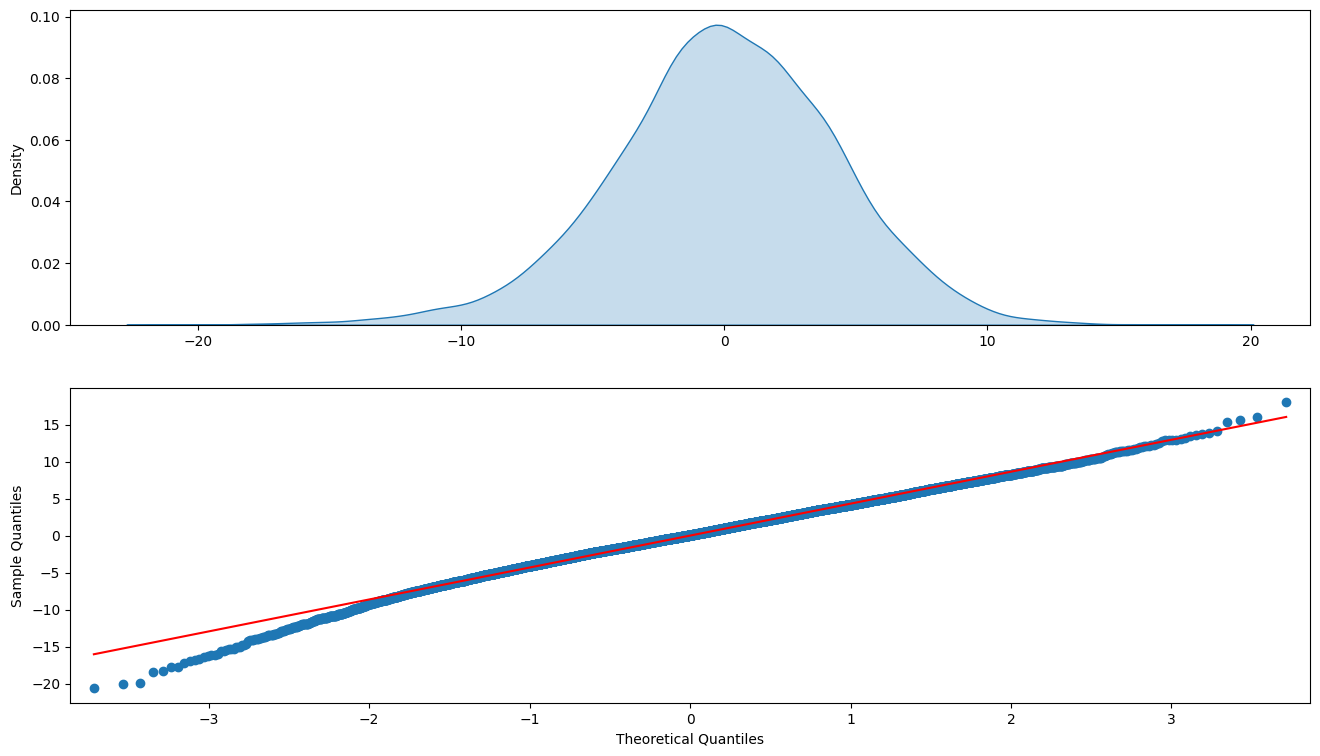

,PID,prob_affected
0,197,0.861798
1,348,0.539236
2,1072,0.540546
3,420,0.557192
4,198,0.875554
...,...,...
9884,22663,0.657958
9885,28642,0.521874
9886,22664,0.802141
9887,22665,0.865362


In [27]:
vertical_break = Model("INDUCED_VERTICAL_BREAK ~ SPIN_RATE_ABSOLUTE + RELEASE_SIDE + RELEASE_HEIGHT + RELEASE_EXTENSION + HORIZONTAL_APPROACH_ANGLE + VERTICAL_APPROACH_ANGLE", data)
#vertical_break.scale_data(data.iloc[:,3:])
#vertical_break.build_model("PITCHER_KEY")
vertical_break.build_model("PITCHER_KEY","PITCH_TYPE_TRACKED_KEY")
print(vertical_break.calc_rmse())
print(vertical_break.get_summary())
print(vertical_break.get_residuals())
vertical_break.plot_resid()
prob_vertical = vertical_break.compute_prob()
display(prob_vertical)

4.693461830246344
                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    HORIZONTAL_BREAK
No. Observations:      9831       Method:                REML            
No. Groups:            1          Scale:                 22.0443         
Min. group size:       9831       Log-Likelihood:        -29170.7419     
Max. group size:       9831       Converged:             Yes             
Mean group size:       9831.0                                            
-------------------------------------------------------------------------
                          Coef.    Std.Err.      z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                 18.459        4.923   3.749 0.000  8.809 28.109
SPIN_RATE_ABSOLUTE         0.009        0.000  55.847 0.000  0.009  0.009
RELEASE_SPEED             -0.560        0.010 -57.169 0.000 -0.579 -0.541
RELEASE_SIDE               5.235      

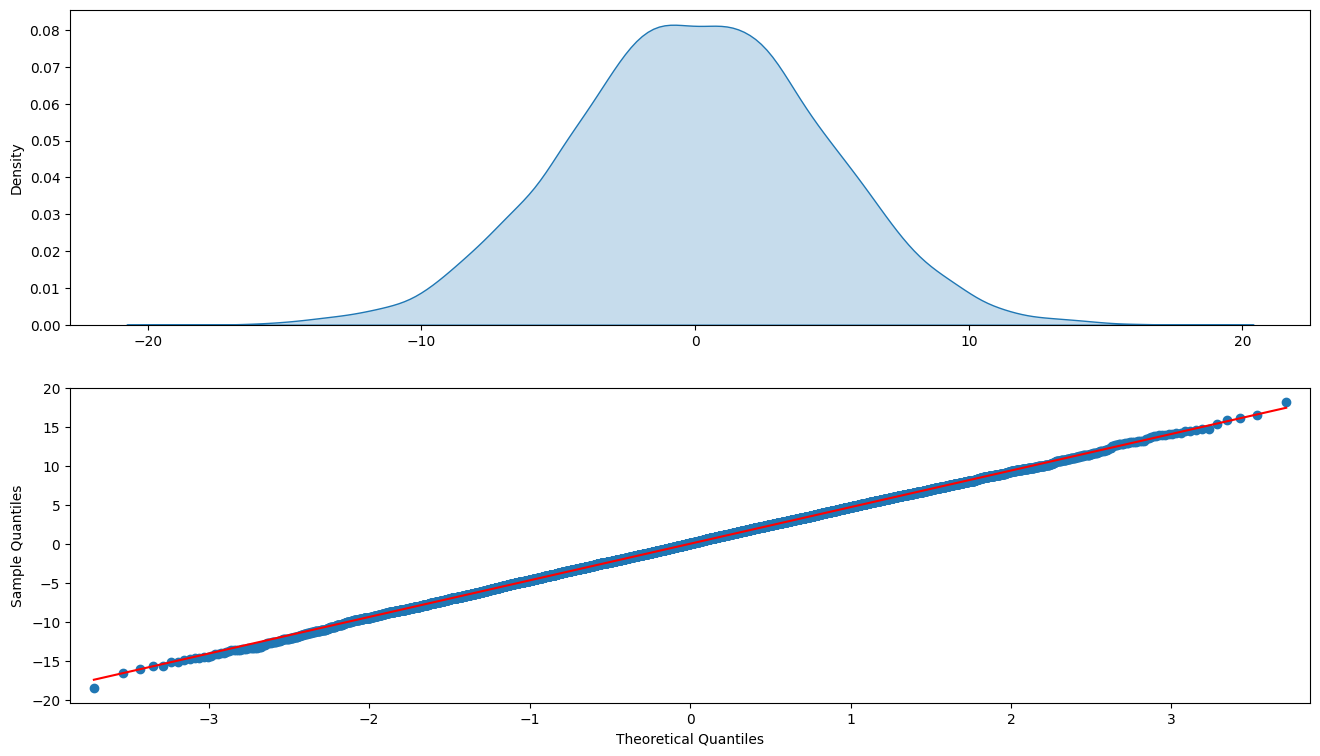

,PID,prob_affected
0,197,0.549053
1,348,0.909475
2,1072,0.879886
3,420,0.719902
4,198,0.844348
...,...,...
9884,22663,0.754837
9885,28642,0.562237
9886,22664,0.684169
9887,22665,0.840237


In [28]:
horizontal_break = Model("HORIZONTAL_BREAK ~ SPIN_RATE_ABSOLUTE + RELEASE_SPEED + RELEASE_SIDE + RELEASE_HEIGHT + RELEASE_EXTENSION + HORIZONTAL_APPROACH_ANGLE", data)
#horizontal_break.scale_data(data.iloc[:,3:])
#horizontal_break.build_model("PITCHER_KEY")
horizontal_break.build_model("PITCHER_KEY","PITCH_TYPE_TRACKED_KEY")
print(horizontal_break.calc_rmse())
print(horizontal_break.get_summary())
print(horizontal_break.get_residuals())
horizontal_break.plot_resid()
prob_horizontal = horizontal_break.compute_prob()
display(prob_horizontal)

In [29]:
data['prob_affected'] = (prob_vertical['prob_affected'] + prob_horizontal['prob_affected'])/2
final_prob = data[['PID','prob_affected']]
final_prob

,PID,prob_affected
0,197,0.705426
1,348,0.724355
2,1072,0.710216
3,420,0.638547
4,198,0.859951
...,...,...
9884,22663,0.706398
9885,28642,0.542055
9886,22664,0.743155
9887,22665,0.852799


In [30]:
final_prob.to_csv('submission.csv',index=False)